# Study Case : Winscosin Breast Cancer

#### Benedict Aryo
As part of Study Case Assignment on Make Ai Bootcamp
##### June 2018

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) <br>b) texture (standard deviation of gray-scale values) <br>c) perimeter <br>d) area <br>e) smoothness (local variation in radius lengths) <br>f) compactness (perimeter^2 / area - 1.0) <br>g) concavity (severity of concave portions of the contour) <br>h) concave points (number of concave portions of the contour) <br>i) symmetry <br>j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Import Library and Dataset

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('bmh')

In [2]:
df=pd.read_csv('Dataset/data.csv')
print("Dataset size : ",df.shape)
df=df.drop(columns=['id','Unnamed: 32'])
df.head()

Dataset size :  (569, 33)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
pandas_profile=pandas_profiling.ProfileReport(df)
pandas_profile.to_file(outputfile='Pandas_ProfilingOutput.html')
#pandas_profile

## [Detail HTML Pandas Profiling](Pandas_ProfilingOutput.html)

### Explore the Values

Explore Distribution values from the dataset using describe statistic and histogram

In [4]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


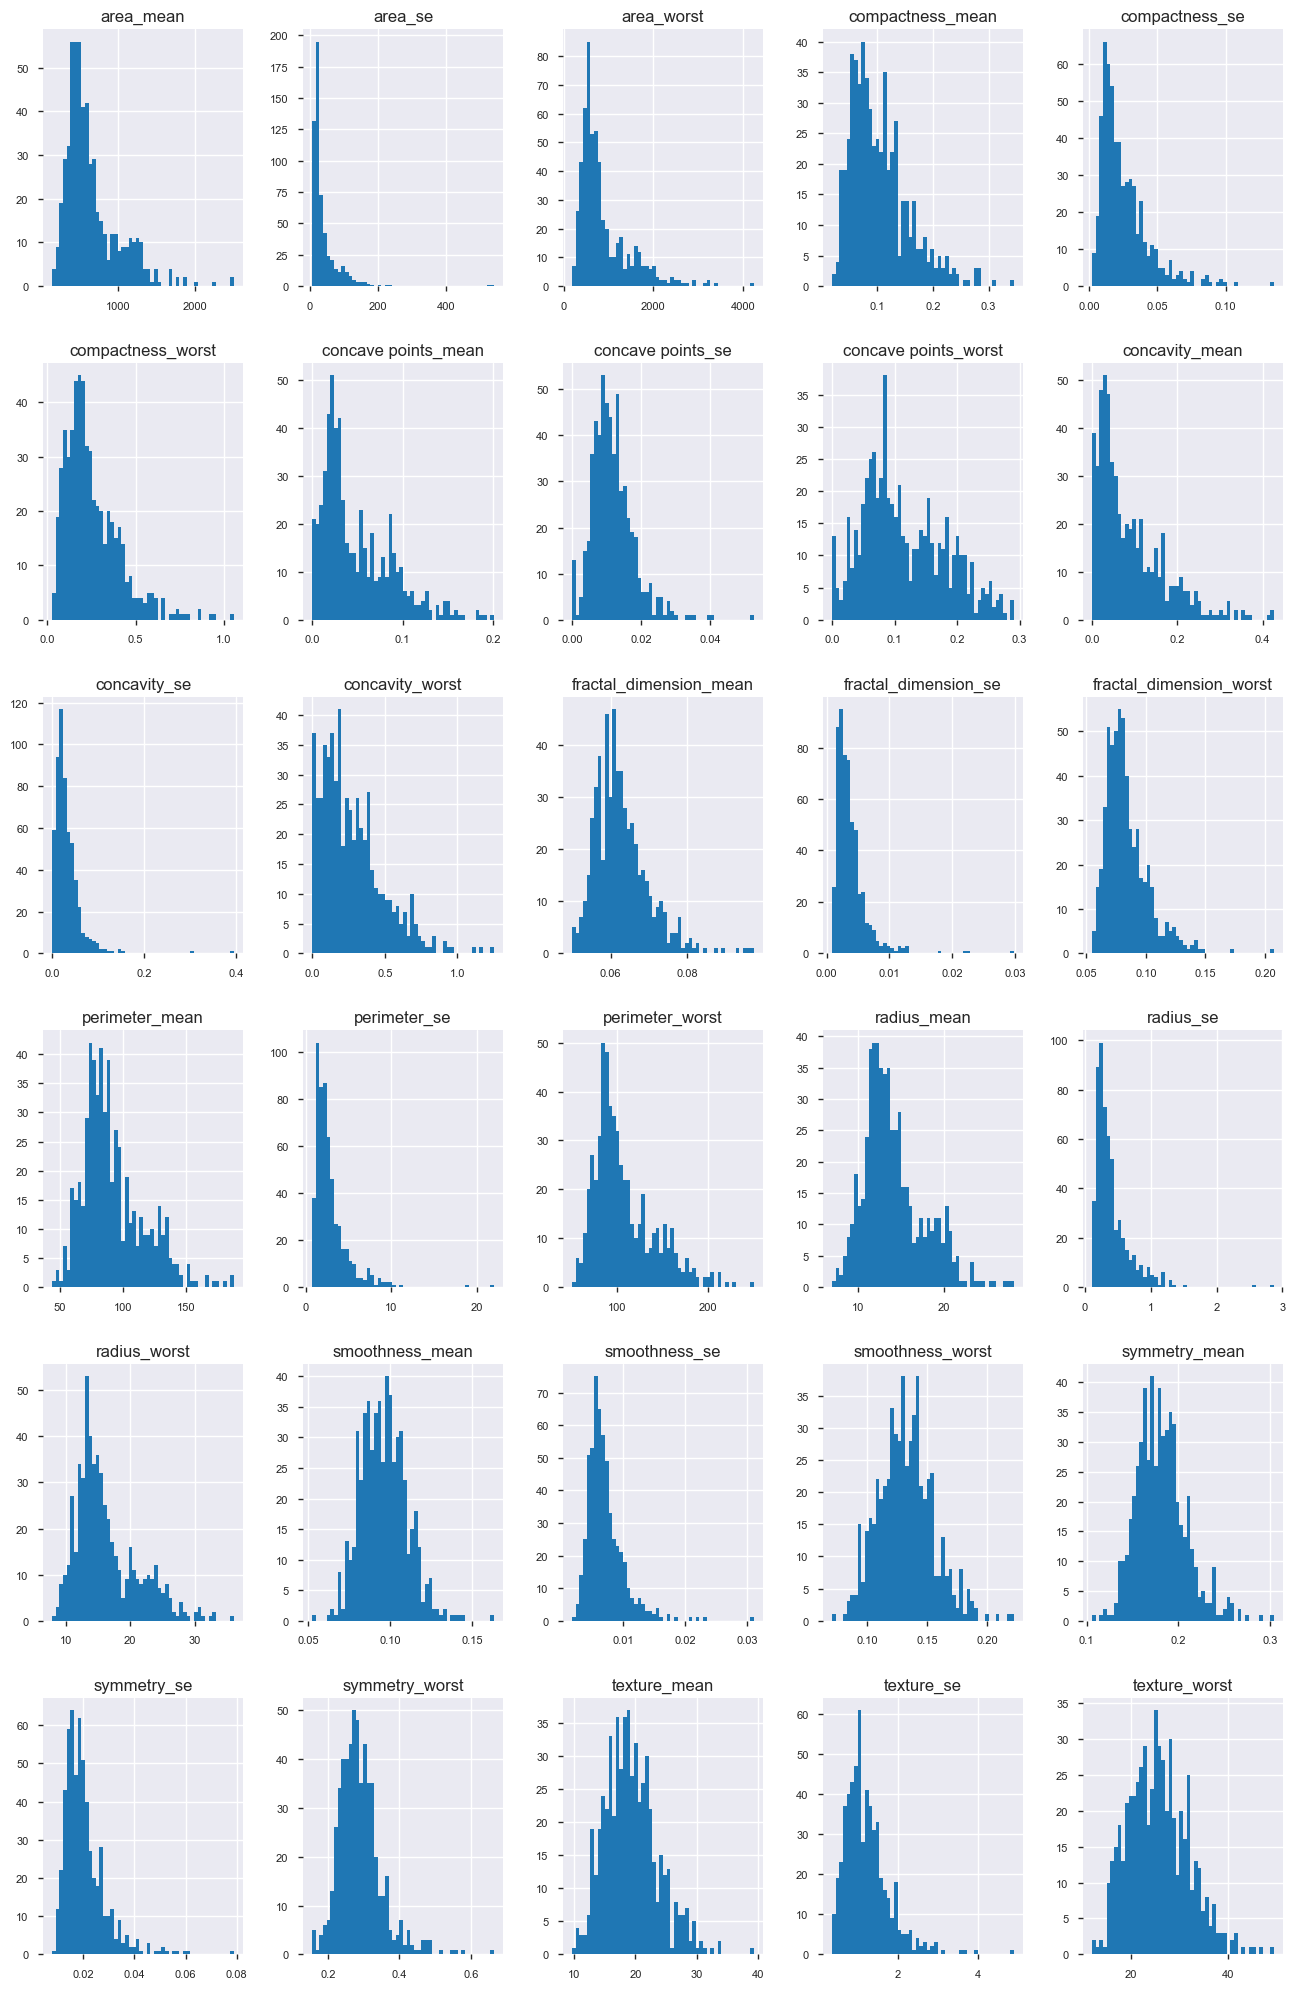

In [5]:
df.hist(figsize=(16,25),bins=50,xlabelsize=8,ylabelsize=8);


## Training Dataset Preparation

Since most of the Algorithm machine learning only accept array like as input, so we need to create an array from dataframe set to X and y array before running machine learning algorithm

In [6]:
X=np.array(df.drop(columns=['diagnosis']))
y=df['diagnosis'].values

In [7]:
print ("X dataset shape : ",X.shape)
print ("y dataset shape : ",y.shape)

X dataset shape :  (569, 30)
y dataset shape :  (569,)


The dataset is splitted by X the parameter and y for classification labels

# Machine Learning Model

### Import Machine Learning Library from Scikit-Learn

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Using 5 Machine Learning Model

Machine learning model used is Classification model, since the purpose of this Study case is to classify diagnosis between "Malignant" (M) Breast Cancer and "Benign" (B) Breast Cancer

* Model 1 : Using Simple Logistic Regression
* Model 2 : Using Support Vector Classifier
* Model 3 : Using Decision Tree Classifier
* Model 4 : Using Random Forest Classifier
* Model 5 : Using Gradient Boosting Classifier

In [9]:
model_1 = LogisticRegression()
model_2 = SVC()
model_3 = DecisionTreeClassifier()
model_4 = RandomForestClassifier()
model_5 = GradientBoostingClassifier()

# Model Fitting

since we need to fit the dataset into algorithm, so proper spliting dataset into training set and test set are required

## Method 1. Train test split

Using Scikit learn built in tools to split data into training set and test set to check the result score of the model <br>
train_test_split configuration using 20% data to test and 80& data to train the model, random_state generator is 45.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print ("Train size : ",X_train.shape)
print ("Test size : ",X_test.shape)

Train size :  (455, 30)
Test size :  (114, 30)


### Fitting train dataset into model

In [11]:
model_1.fit(X_train,y_train)
model_2.fit(X_train,y_train)
model_3.fit(X_train,y_train)
model_4.fit(X_train,y_train)
model_5.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### Predict and show Score and F1 Score prediction using test data

In [12]:
# Predict data
y_pred1=model_1.predict(X_test)
y_pred2=model_2.predict(X_test)
y_pred3=model_3.predict(X_test)
y_pred4=model_4.predict(X_test)
y_pred5=model_5.predict(X_test)

#Show F1 Score
from sklearn.metrics import f1_score
f1_model1=f1_score(y_test,y_pred1,average='weighted',labels=np.unique(y_pred1))
f1_model2=f1_score(y_test,y_pred2,average='weighted',labels=np.unique(y_pred2))
f1_model3=f1_score(y_test,y_pred3,average='weighted',labels=np.unique(y_pred3))
f1_model4=f1_score(y_test,y_pred4,average='weighted',labels=np.unique(y_pred4))
f1_model5=f1_score(y_test,y_pred5,average='weighted',labels=np.unique(y_pred5))

print("F1 score Model 1 : ",f1_model1)
print("F1 score Model 2 : ",f1_model2)
print("F1 score Model 3 : ",f1_model3)
print("F1 score Model 4 : ",f1_model4)
print("F1 score Model 5 : ",f1_model5)

F1 score Model 1 :  0.9557756825927252
F1 score Model 2 :  0.7741935483870968
F1 score Model 3 :  0.9112731152204836
F1 score Model 4 :  0.9557756825927252
F1 score Model 5 :  0.9734654095556352


## Method 2. Cross validation method

Using Cross validation will resulted in more reliability of the model <br>
in this case using StratifiedKFold from Scikit Learn, with n_split = 10 times and Shuffle = True

In [13]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True)
skf.get_n_splits(X,y)

10

In [14]:
# Set Container to gather the cross validation result of the model
score_list_model1,score_list_model2,score_list_model3,score_list_model4,score_list_model5 = [],[],[],[],[]

In [15]:
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_1.fit(X_train, y_train)
    model_2.fit(X_train, y_train)
    model_3.fit(X_train, y_train)
    model_4.fit(X_train, y_train)
    model_5.fit(X_train, y_train)
    y_pred1=model_1.predict(X_test)
    y_pred2=model_2.predict(X_test)
    y_pred3=model_3.predict(X_test)
    y_pred4=model_4.predict(X_test)
    y_pred5=model_5.predict(X_test)
    score_list_model1.append(f1_score(y_test,y_pred1,average='weighted',labels=np.unique(y_pred1)))
    score_list_model2.append(f1_score(y_test,y_pred2,average='weighted',labels=np.unique(y_pred2)))
    score_list_model3.append(f1_score(y_test,y_pred3,average='weighted',labels=np.unique(y_pred3)))
    score_list_model4.append(f1_score(y_test,y_pred4,average='weighted',labels=np.unique(y_pred4)))
    score_list_model5.append(f1_score(y_test,y_pred5,average='weighted',labels=np.unique(y_pred5)))
 

In [16]:
score_table = pd.DataFrame({"F1 Score model 1" :score_list_model1,
                           "F1 Score model 2" :score_list_model2,
                           "F1 Score model 3" :score_list_model3,
                           "F1 Score model 4" :score_list_model4,
                           "F1 Score model 5" :score_list_model5})
score_table

,F1 Score model 1,F1 Score model 2,F1 Score model 3,F1 Score model 4,F1 Score model 5
0,0.929401,0.765957,0.931034,0.948029,0.948029
1,0.948029,0.765957,0.982829,0.947418,1.000000
2,0.929018,0.774194,0.895625,0.894737,0.930417
3,0.947610,0.774194,0.930417,0.964912,0.982537
4,1.000000,0.774194,0.930417,1.000000,0.982537
5,0.929018,0.774194,0.910661,0.929018,0.964509
6,0.982537,0.774194,0.912683,0.964912,0.964912
7,0.982051,0.769231,0.946153,0.963889,0.963889
8,0.911692,0.769231,0.911105,0.945469,0.982221
9,0.964572,0.769231,0.982221,0.982051,1.000000


In [17]:
final_1=np.mean(score_list_model1)
final_2=np.mean(score_list_model2)
final_3=np.mean(score_list_model3)
final_4=np.mean(score_list_model4)
final_5=np.mean(score_list_model5)

print("F1 Score Average Model_1",final_1)
print("F1 Score Average Model_2",final_2)
print("F1 Score Average Model_3",final_3)
print("F1 Score Average Model_4",final_4)
print("F1 Score Average Model_5",final_5)

F1 Score Average Model_1 0.9523927704887092
F1 Score Average Model_2 0.7710574943244813
F1 Score Average Model_3 0.9333145924345627
F1 Score Average Model_4 0.9540435232696123
F1 Score Average Model_5 0.971905034024636


## Hyperparameter Search
### Purpose is to Optimize Model 5 (Gradient Boosting model)
#### 1. Get Current Params

In [18]:
model_5.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

#### 2. Optimization in _'max depth'_ , _'min samples leaf'_
Using GridSearch CV

In [19]:
from sklearn.model_selection import GridSearchCV
gb_tuned_params = {'max_depth' : [1, 2, 3, 4], 
                   'min_samples_leaf': [1, 3, 5],
                  'min_samples_split' : [2, 3, 5]}
GridGB = GridSearchCV(GradientBoostingClassifier(),gb_tuned_params, cv=5)
GridGB.fit(X,y)

print("Best Params : ",GridGB.best_params_)
print()
means = GridGB.cv_results_['mean_test_score']
stds = GridGB.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, GridGB.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 2}

0.963 (+/-0.037) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.963 (+/-0.037) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.963 (+/-0.037) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.961 (+/-0.036) for {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.961 (+/-0.036) for {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 3}
0.961 (+/-0.036) for {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.968 (+/-0.030) for {'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.968 (+/-0.030) for {'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 3}
0.968 (+/-0.030) for {'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.953 (+/-0.042) for {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.954 (+/-0.043) for {'max_depth': 2, 'min_samples_leaf': 1, 'min_samp

#### 3. Fit to find F1 Score using hyperparameter best params in model_5 GradientBoostingClassifier

In [20]:
Optimized_model=GradientBoostingClassifier(max_depth=3,min_samples_leaf=5,min_samples_split=5) 

score_list_optimized=[]

for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    Optimized_model.fit(X_train, y_train)
    y_pred=Optimized_model.predict(X_test)
    score_list_optimized.append(
        f1_score(y_test,y_pred,average='weighted',labels=np.unique(y_pred)))
print()
print("F1 Score Optimized model : ",np.mean(score_list_optimized))


F1 Score Optimized model :  0.969909500760872



# Conclusion

After Testing 5 Model of machine learning classifier and testing both using train test split and cross validation method, conclude that __Model 5__ which is __Gradient Boosting__ winth with crossvalidation F1 Score  __0.969__ , and Optimized parameter : 'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 2